#### SMOTE (Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Oversampling Technique) is a technique used in Machine Learning to address imbalanced datasets, where the minority class has significantly fewer instances over the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances. 

In [1]:
# creating imbalanced dataset
from sklearn.datasets import make_classification

x,y=make_classification(random_state=12,
    n_samples=1000,
    weights=[0.9],
    n_redundant=0,
    n_clusters_per_class=1,
    n_features=2)


In [2]:
x

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]], shape=(1000, 2))

In [3]:
y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [4]:
import pandas as pd
df1=pd.DataFrame(x, columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['Target'])

In [5]:
df1

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206
...,...,...
995,-0.712495,-0.880452
996,-2.625830,-2.827891
997,-1.326439,-1.815178
998,-0.833486,-0.514647


In [6]:
df2

,Target
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [7]:
data=pd.concat([df1,df2],axis=1)

In [8]:
data.head(20)

,f1,f2,Target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
5,-1.421057,-1.173426,0
6,-1.120023,-0.764000,0
7,-1.669289,-2.009060,0
8,-1.775777,-1.800168,0
9,-0.863266,0.016043,0


In [9]:
data['Target'].value_counts()

Target
0    900
1    100
Name: count, dtype: int64

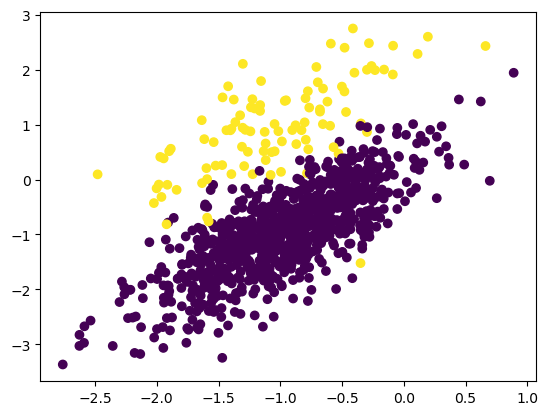

In [10]:
import matplotlib.pyplot as plt

plt.scatter(data['f1'],data['f2'], c=data['Target']);


In [11]:
!conda install imblearn 

Channels:
 - defaults
Platform: osx-arm64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - imblearn

Current channels:

  - defaults

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [13]:
from imblearn.over_sampling import SMOTE

In [15]:
# transform the dataset
oversample=SMOTE()
x,y=oversample.fit_resample(data[['f1','f2']],data['Target'])

In [17]:
x.shape

(1800, 2)

In [18]:
y.shape

(1800,)

In [19]:
len(y[y==0])

900

In [20]:
len(y[y==1])

900

In [23]:
final_dataset=pd.concat([x,y],axis=1)
final_dataset

,f1,f2,Target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.368995,1.418887,1
1796,-1.035045,0.961229,1
1797,-1.984924,-0.226935,1
1798,-0.743036,1.676342,1


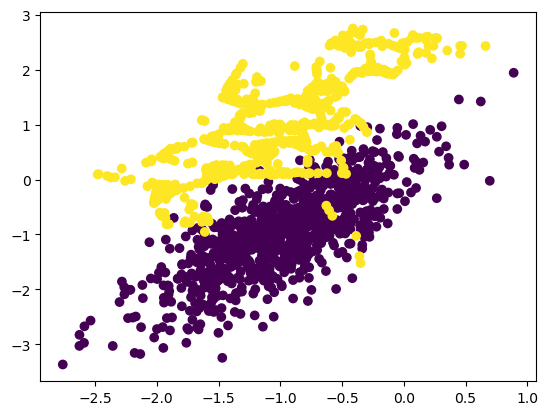

In [ ]:
plt.scatter(final_dataset['f1'],final_dataset['f2'],c=final_dataset['Target']);